<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>
# Continuous Probability Distributions in Python
*CSCI 3022 - Dirk Grunwald*

# Continuous Distributions

As always, we need our toolbag.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

As with discrete distributions, the continuous distributions are implemented in SciPy. Let's bring in the appropriate library

In [2]:
import scipy.stats as stats

The ]documentation for the continuous distributions](https://docs.scipy.org/doc/scipy-1.0.0/reference/tutorial/stats/continuous.html) is structured similarly to that for the discrete distributions.

The code interface is the same, except that the *probability mass function* is replaced by the *probability distribution function* (PDF) adopting the terminology of continuous distributions.

We'll use the Normal distribution for our example. This distribution can be "frozen" using no parameters, in which case it uses the standard normal (mean=0, s.d. = 1) or you can specify the "loc"-ation of the mean and the standard deviation using "scale".

In [3]:
fr_norm = stats.norm(loc=100, scale=10)

Drawing random samples is the same..

In [4]:
fr_norm.rvs(size=5)

array([114.65363492,  99.52122976, 114.72743252, 102.63352547,
       105.64931199])

And, we can plot a histogram of a large number of samples. Here, we "norm" the histogram so that shows the percentage of items in each bin rather than the count of the items. This makes it easier to compare to the PDF, which we also draw.

In [5]:
fr_norm.rvs(size=1000)

array([ 92.44750811, 108.49138666,  95.93021811, 107.44591651,
       105.5685515 , 109.77717625,  96.09294091,  96.73843219,
       116.8091504 , 112.59901938, 101.60787147, 109.35259307,
       112.90234463,  74.99253549, 106.13805832,  85.52537252,
        87.71691316, 105.60204012, 119.83362404, 112.84889301,
       109.61010708,  97.4152887 ,  80.07815295,  94.95160849,
        93.20986551,  99.16389296,  93.76571391, 114.04381212,
       116.21451566,  93.09052083,  86.02685497, 104.07995001,
       100.49307602, 100.6386134 , 108.5693626 ,  88.50945193,
        86.5833374 ,  97.12692767,  99.03605944,  87.08496268,
        98.12089972,  92.47951115,  91.82386274, 110.27885487,
        90.36530476,  79.21798285, 117.87312115, 108.49345203,
       111.71164154, 100.80232479,  97.43860993,  96.93821338,
       109.74454796,  96.94768798, 100.50267402, 119.43686899,
        98.68658044,  93.84723972, 113.63423258,  98.66876229,
       100.43617703,  93.85238547, 101.04253695, 104.55

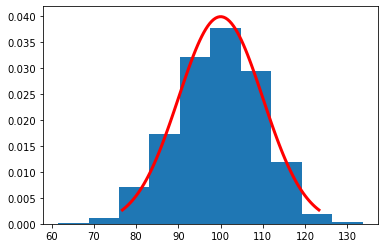

In [6]:
plt.hist( fr_norm.rvs(size=1000), density=True);

fr_x = np.linspace(fr_norm.ppf(0.01), fr_norm.ppf(0.99), 100)

plt.plot(fr_x, fr_norm.pdf(fr_x), 'r-', lw=3);

Likewise, we can draw the CDF

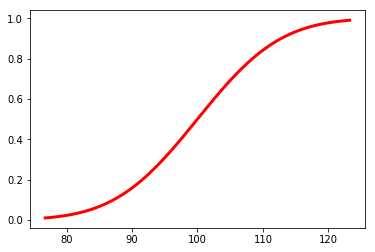

In [7]:
plt.plot(fr_x, fr_norm.cdf(fr_x), 'r-', lw=3);

And, there the PPF function provides the quantile or percent probability function.

## Using CDF to compute $P(left \leq X \leq right)$

With continious distributions, we will often want to compute the probabilty of events occuring within a range of values.

In the example below, we're using the CPF to show that ~68% of the samples from the Normal(100,10) distribution will be less than one standard deviation from the mean.

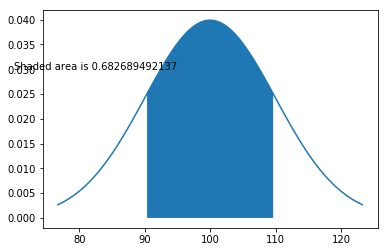

In [15]:
plt.plot(fr_x, fr_norm.pdf(fr_x));

left,right = 90, 110

one_std = fr_x[ (fr_x >= left) & (fr_x <= right) ]

plt.fill_between( one_std, fr_norm.pdf( one_std ) )

shaded_area = fr_norm.cdf(right) - fr_norm.cdf(left)

plt.text(70, 0.03, "Shaded area is " + str(shaded_area));

## Fitting parameters of a distribution

Lastly, each of the distributions has a method to "fit" data to the distribution -- the `fit` method takes samples of data and returns the data needed to create an instance of the distribution.

Let's do this for the normal distribution

In [16]:
samples = fr_norm.rvs(size = 100)

fitted_params = stats.norm.fit( samples )

fitted_params

(100.82745903716744, 11.031703344980841)

# The Distributions

The MIPS book mentions the following continuous distributions:
* uniform
* pareto
* normal

And, we're covering these in the lecture videos:
* Exponential
* Gamma
* Multivariate Normal
* Dirchlet
These are all implemented in SciPy, but we'll skip the Multivariate Normal and Dirchlet since those require plotting in 3d.

## Uniform

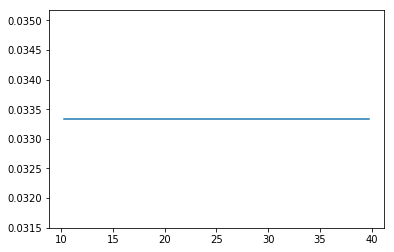

In [17]:
# Uniform continuous from 10..30

fr_u = stats.uniform(10,30)
x_u = np.linspace(fr_u.ppf(0.01), fr_u.ppf(0.99), 100)

plt.plot(x_u, fr_u.pdf(x_u));

## Pareto

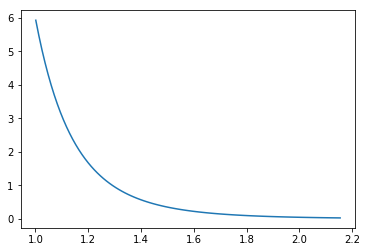

In [20]:

fr_p = stats.pareto(b = 6.0)
x_p = np.linspace(fr_p.ppf(0.01), fr_p.ppf(0.99), 100)

plt.plot(x_p, fr_p.pdf(x_p));

## Exponential

The exponential distribution takes a single parameter; usually this is specified as $\lambda$ and the mean value is then $1 / \lambda$.

The SciPy library [takes two parameters](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon), a *loc*action and scale.

The resulting distribution would have mean $ loc + scale $. The standard definition of the Exponential distribution would have the location be zero.

The mean of this distribution is  0.001


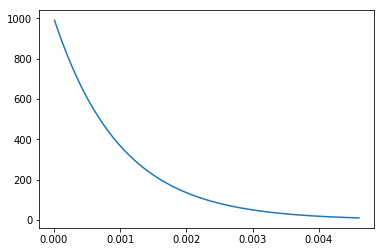

In [23]:
fr_e = stats.expon(scale = 0.001, loc=0)
x_e = np.linspace(fr_e.ppf(0.01), fr_e.ppf(0.99), 100)

plt.plot(x_e, fr_e.pdf(x_e));
print('The mean of this distribution is ', fr_e.mean() )

## Gamma

When a is an integer, the Gamam distribution reduces to the Erlang distribution, and when a=1 to the exponential distribution.

The mean of this distribution is  0.57


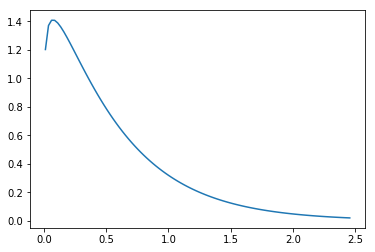

In [25]:
fr_er = stats.gamma(a = 1.14, scale = 0.5, loc=0)
x_er = np.linspace(fr_er.ppf(0.01), fr_er.ppf(0.99), 100)

plt.plot(x_er, fr_er.pdf(x_er));
print('The mean of this distribution is ', fr_er.mean() )

# Quantile-Quantile Plot

As mentioned in class, *quantiles* or the PPF is often used as a visual indicator for a set of data matching a certain distribution. Typically, this is done for a normal distribution.


In [26]:
n_data = stats.norm.rvs(loc=10, scale=2, size = 100)

e_data = stats.expon.rvs(scale=2, size=100)

b_data = stats.binom.rvs(n=100,p=0.5,size=1000)

p_data = stats.poisson.rvs(10,size=100)

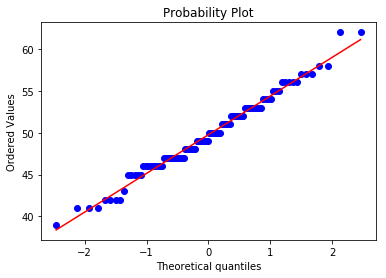

In [31]:
stats.probplot(b_data, dist='norm', plot=plt);